Classes: ['Zac', 'alexandra', 'courtney', 'elizabeth', 'henry']
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 196MB/s]
Epoch 1/15 [val]: 100%|██████████| 3/3 [00:21<00:00,  7.16s/it]


Epoch 1: train_loss=1.0937 acc=0.580 | val_loss=0.6886 acc=0.839
✅ Saved best checkpoint @ /content/drive/MyDrive/FaceQuadrantNet/baseline_face_recognition.pth (val_acc=0.839)


Epoch 2/15 [val]: 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]


Epoch 2: train_loss=0.1480 acc=1.000 | val_loss=0.1818 acc=0.989
✅ Saved best checkpoint @ /content/drive/MyDrive/FaceQuadrantNet/baseline_face_recognition.pth (val_acc=0.989)


Epoch 3/15 [val]: 100%|██████████| 3/3 [00:00<00:00,  9.53it/s]


Epoch 3: train_loss=0.0332 acc=1.000 | val_loss=0.1125 acc=0.977


Epoch 4/15 [val]: 100%|██████████| 3/3 [00:00<00:00, 10.04it/s]


Epoch 4: train_loss=0.0108 acc=1.000 | val_loss=0.0954 acc=0.989


Epoch 5/15 [val]: 100%|██████████| 3/3 [00:00<00:00, 10.13it/s]


Epoch 5: train_loss=0.0097 acc=1.000 | val_loss=0.0879 acc=0.989


Epoch 6/15 [val]: 100%|██████████| 3/3 [00:00<00:00,  9.85it/s]


Epoch 6: train_loss=0.0073 acc=1.000 | val_loss=0.0871 acc=0.989


Epoch 7/15 [val]: 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch 7: train_loss=0.0067 acc=1.000 | val_loss=0.0872 acc=0.989


Epoch 8/15 [val]: 100%|██████████| 3/3 [00:00<00:00,  9.91it/s]


Epoch 8: train_loss=0.0091 acc=1.000 | val_loss=0.0863 acc=0.989


Epoch 9/15 [val]: 100%|██████████| 3/3 [00:00<00:00,  9.12it/s]


Epoch 9: train_loss=0.0067 acc=1.000 | val_loss=0.0861 acc=0.989


Epoch 10/15 [val]: 100%|██████████| 3/3 [00:00<00:00, 10.03it/s]


Epoch 10: train_loss=0.0085 acc=1.000 | val_loss=0.0873 acc=0.989


Epoch 11/15 [val]: 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


Epoch 11: train_loss=0.0064 acc=1.000 | val_loss=0.0852 acc=0.989


Epoch 12/15 [val]: 100%|██████████| 3/3 [00:00<00:00,  9.13it/s]


Epoch 12: train_loss=0.0055 acc=1.000 | val_loss=0.0858 acc=0.989


Epoch 13/15 [val]: 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]


Epoch 13: train_loss=0.0057 acc=1.000 | val_loss=0.0880 acc=0.989


Epoch 14/15 [val]: 100%|██████████| 3/3 [00:00<00:00,  9.62it/s]


Epoch 14: train_loss=0.0072 acc=1.000 | val_loss=0.0862 acc=0.989


Epoch 15/15 [val]: 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]


Epoch 15: train_loss=0.0047 acc=1.000 | val_loss=0.0871 acc=0.989

✅ Training complete. Best val acc = 0.989

✅ Final Validation Accuracy: 98.85%
              precision    recall  f1-score   support

         Zac      0.933     1.000     0.966        14
   alexandra      1.000     1.000     1.000        17
    courtney      1.000     0.933     0.966        15
   elizabeth      1.000     1.000     1.000        18
       henry      1.000     1.000     1.000        23

    accuracy                          0.989        87
   macro avg      0.987     0.987     0.986        87
weighted avg      0.989     0.989     0.989        87



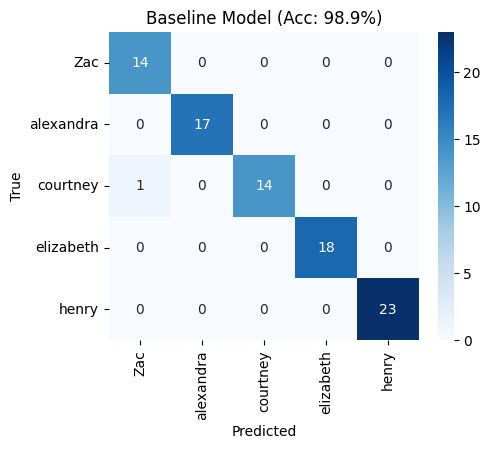

In [1]:
# ============================================================
# 👤 BASELINE FACE RECOGNITION MODEL (Global-Only CNN)
# Uses EXACT same hyperparameters as QuadrantFusionNet
# ============================================================

!pip install torch torchvision tqdm seaborn --quiet

import os, torch, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from torchvision import datasets, transforms, models
import torch.nn as nn
import torch.optim as optim

# ---------------- CONFIG (Same as QuadrantFusion) ----------------
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BASE_DIR = "/content/drive/MyDrive/FaceQuadrantNet/Dataset"   # training dataset (unmasked)
SAVE_PATH = "/content/drive/MyDrive/FaceQuadrantNet/baseline_face_recognition.pth"

BATCH_SIZE = 32            # same
EPOCHS = 15                # same
VAL_SPLIT = 0.2            # same
LR = 1e-4                  # same

# ---------------- TRANSFORMS (Same as QuadrantFusion) ----------------
train_tfms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],
                         std=[0.229,0.224,0.225]),
])

val_tfms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],
                         std=[0.229,0.224,0.225]),
])

# ---------------- DATASET (Same logic) ----------------
full_ds = datasets.ImageFolder(BASE_DIR, transform=train_tfms)
class_names = full_ds.classes
print("Classes:", class_names)

val_len = int(len(full_ds) * VAL_SPLIT)
train_len = len(full_ds) - val_len
train_ds, val_ds = torch.utils.data.random_split(full_ds, [train_len, val_len])
val_ds.dataset.transform = val_tfms

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

# ---------------- MODEL (ResNet18 - Global Only) ----------------
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model = model.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# ---------------- TRAINING LOOP ----------------
best_acc = 0.0
train_losses, val_losses = [], []

for epoch in range(1, EPOCHS+1):
    model.train()
    running_loss, correct, total = 0, 0, 0

    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch}/{EPOCHS} [train]"):
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        out = model(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        _, preds = torch.max(out, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for imgs, labels in tqdm(val_loader, desc=f"Epoch {epoch}/{EPOCHS} [val]"):
            imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
            out = model(imgs)
            loss = criterion(out, labels)
            val_loss += loss.item() * imgs.size(0)
            _, preds = torch.max(out, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    scheduler.step()

    print(f"Epoch {epoch}: train_loss={train_loss:.4f} acc={train_acc:.3f} | val_loss={val_loss:.4f} acc={val_acc:.3f}")

    if val_acc > best_acc:
        best_acc = val_acc
        torch.save({'model_state': model.state_dict(),
                    'val_acc': best_acc,
                    'epoch': epoch}, SAVE_PATH)
        print(f"✅ Saved best checkpoint @ {SAVE_PATH} (val_acc={val_acc:.3f})")

print(f"\n✅ Training complete. Best val acc = {best_acc:.3f}")

# ---------------- EVALUATION ----------------
ckpt = torch.load(SAVE_PATH, map_location=DEVICE)
model.load_state_dict(ckpt['model_state'])
model.eval()

all_preds, all_labels = [], []
with torch.no_grad():
    for imgs, labels in val_loader:
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        out = model(imgs)
        preds = torch.argmax(out, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

acc = accuracy_score(all_labels, all_preds)
print(f"\n✅ Final Validation Accuracy: {acc*100:.2f}%")
print(classification_report(all_labels, all_preds, target_names=class_names, digits=3))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title(f"Baseline Model (Acc: {acc*100:.1f}%)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
